**Sales Performance Analysis of a Manufacturing Organization (TechnoFab Manufacturing Ltd)**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se

%matplotlib inline
pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")

In [88]:
n=1000
dates=pd.date_range('2022-01-01', '2024-12-31').strftime('%Y-%m-%d')
product_categories=['Machinery', 'Tools', 'Electrical', 'Automotive', 'Hydraulics']
regions=['North', 'South', 'East', 'West']
customer_types=['Corporate', 'Distributor', 'Retail']
sales_channels=['Online', 'Offline']

#Given Dataset:
#Dataset Name: manufacturing_sales.csv
data = {
    'Order_ID': np.arange(1001, 1001+n),
    'Date': np.random.choice(dates, n),
    'Product_Category': np.random.choice(product_categories, n),
    'Product_Name': np.random.choice(['Pump', 'Compressor', 'Welding Machine', 'Conveyor Belt', 'Drill', 'Motor', 'Valve', 'Gearbox'], n),
    'Region': np.random.choice(regions, n),
    'Customer_Type': np.random.choice(customer_types, n),
    'Units_Sold': np.random.randint(10, 200, n),
    'Unit_Price': np.random.randint(500, 5000, n),
    'Discount': np.random.uniform(0, 0.25, n),
    'Sales_Channel': np.random.choice(sales_channels, n)
}

df=pd.DataFrame(data)
df['Date']=pd.to_datetime(df['Date'])
df['Total_Sales']=df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])
# Here I am just assuming profit margin between 10% to 30%.
df['Profit'] = df['Total_Sales'] * np.random.uniform(0.10, 0.30, n)
df.head(6)

,Order_ID,Date,Product_Category,Product_Name,Region,Customer_Type,Units_Sold,Unit_Price,Discount,Sales_Channel,Total_Sales,Profit
0,1001,2022-05-02,Machinery,Pump,East,Retail,151,4792,0.075108,Online,669244.096831,196469.197368
1,1002,2023-01-20,Automotive,Valve,West,Corporate,174,4047,0.060749,Online,661400.197297,87217.853372
2,1003,2023-10-23,Tools,Drill,South,Retail,43,3439,0.001431,Offline,147665.375630,32771.743706
3,1004,2023-07-15,Machinery,Conveyor Belt,East,Distributor,59,3707,0.077299,Online,201806.629792,25253.817159
4,1005,2022-07-05,Machinery,Valve,West,Distributor,88,1847,0.033820,Offline,157039.019458,43315.486725
5,1006,2022-04-18,Machinery,Conveyor Belt,North,Retail,162,1272,0.012739,Online,203439.035050,44424.621317


**Performing Exploratory Data Analysis (EDA) for the given Dataset**

In [77]:
print("Shape:", df.shape)

Shape: (1000, 12)


In [78]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Product_Category  1000 non-null   object        
 3   Product_Name      1000 non-null   object        
 4   Region            1000 non-null   object        
 5   Customer_Type     1000 non-null   object        
 6   Units_Sold        1000 non-null   int32         
 7   Unit_Price        1000 non-null   int32         
 8   Discount          1000 non-null   float64       
 9   Sales_Channel     1000 non-null   object        
 10  Total_Sales       1000 non-null   float64       
 11  Profit            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(5)
memory usage: 86.1+ KB


None

In [89]:
display(df.describe().T)

,count,mean,min,25%,50%,75%,max,std
Order_ID,1000.0,1500.5,1001.0,1250.75,1500.5,1750.25,2000.0,288.819436
Date,1000,2023-06-29 11:28:19.199999744,2022-01-01 00:00:00,2022-10-12 18:00:00,2023-06-19 12:00:00,2024-03-19 06:00:00,2024-12-31 00:00:00,NaN
Units_Sold,1000.0,106.637,10.0,60.0,109.5,153.0,199.0,55.023548
Unit_Price,1000.0,2758.777,504.0,1615.75,2771.0,3863.75,4997.0,1288.647925
Discount,1000.0,0.12282,0.000084,0.063623,0.122009,0.185531,0.249309,0.071951
Total_Sales,1000.0,258146.966228,6485.099804,105163.078886,213314.656818,377830.009065,943912.611329,194105.731545
Profit,1000.0,51510.370771,985.91628,18466.605887,39211.676018,70664.370439,239204.937757,43552.214611


In [90]:
assert(df['Units_Sold']>0).all()
assert (df['Unit_Price']>0).all()
assert (df['Total_Sales']>=0).all()

**Univariate Analysis (Single Variable Insights)**

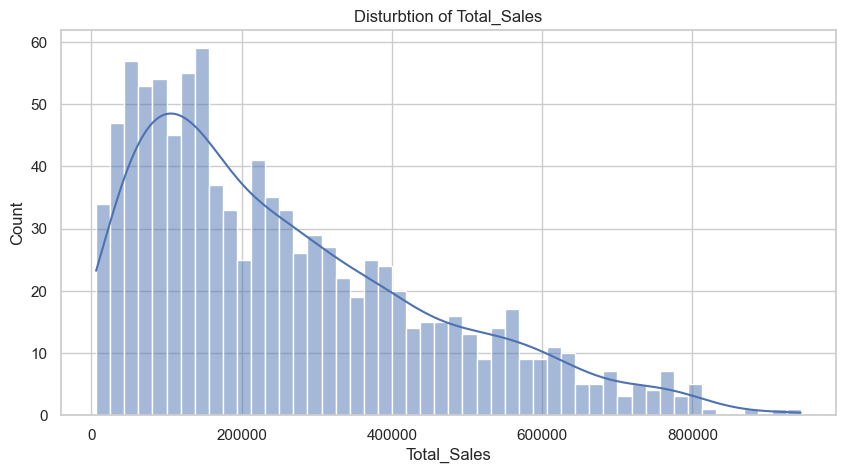

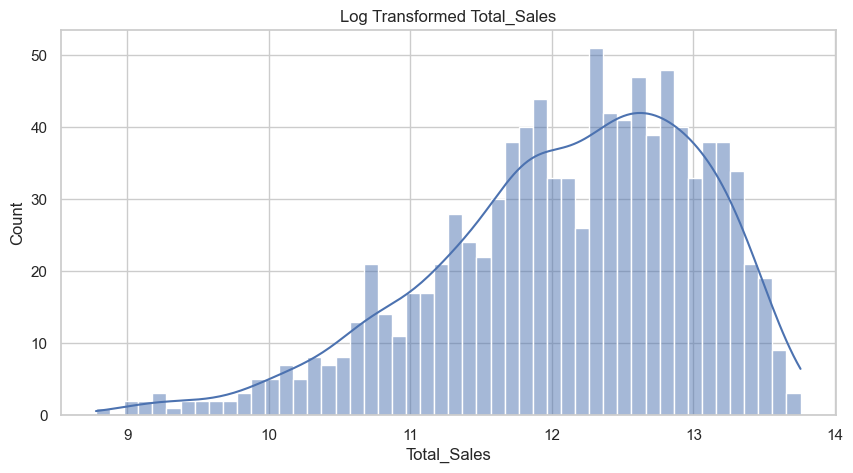

In [91]:
#this is for Total_Sales
plt.figure(figsize=(10,5))
se.histplot(df['Total_Sales'], bins=50, kde=True)
plt.title('Disturbtion of Total_Sales')
plt.xlabel('Total_Sales')
plt.show()

plt.figure(figsize=(10,5))
se.histplot(np.log1p(df['Total_Sales']), bins=50, kde=True)
plt.title('Log Transformed Total_Sales')
plt.show()

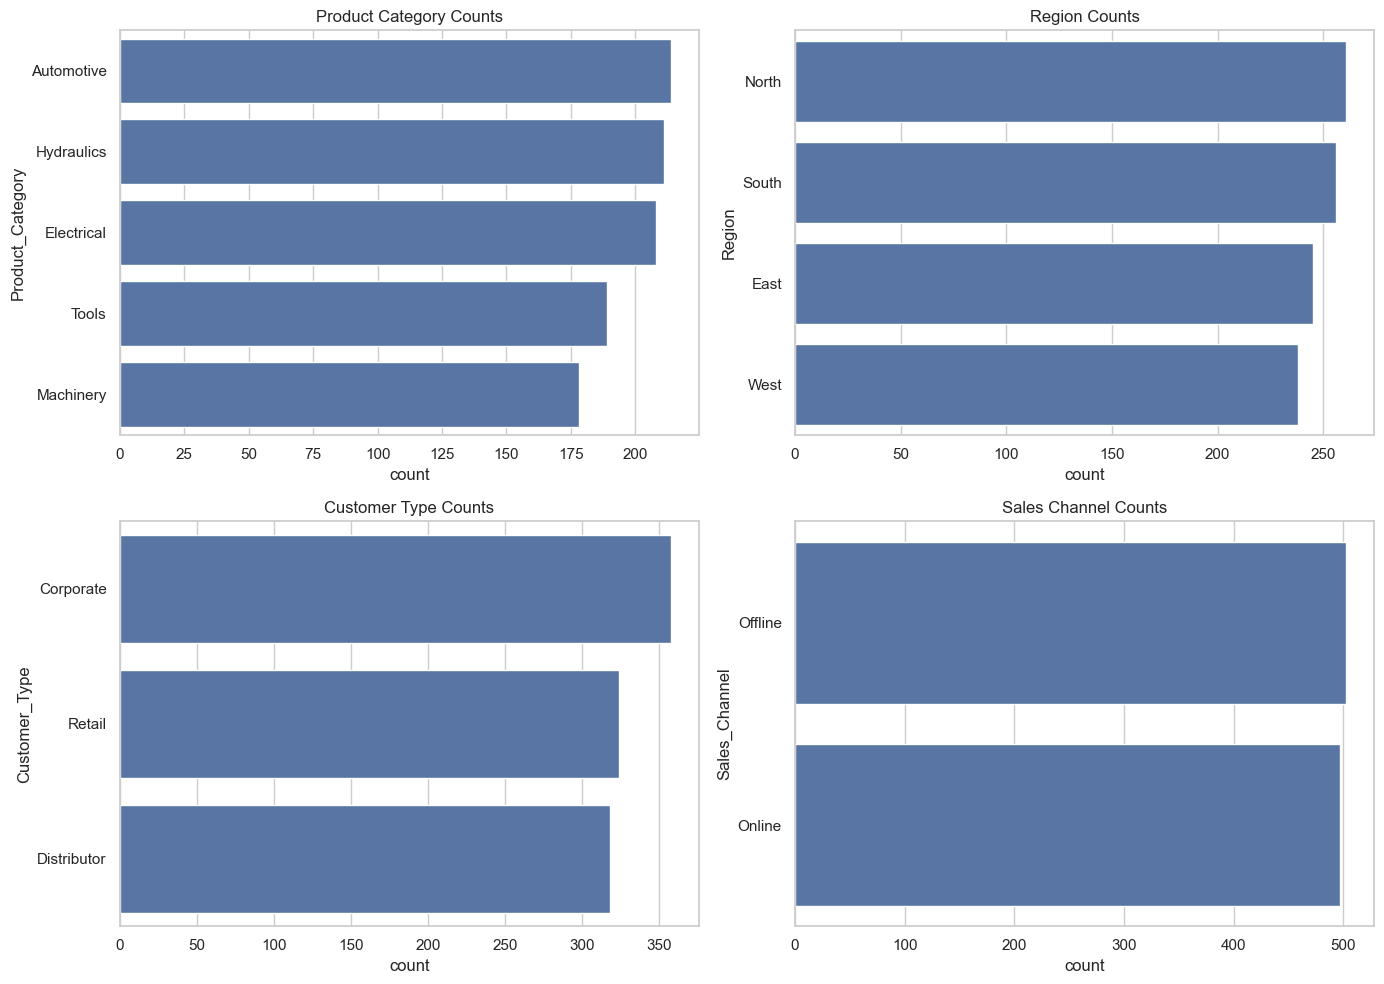

In [92]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
se.countplot(y='Product_Category', data=df, ax=axes[0,0], order=df['Product_Category'].value_counts().index)
axes[0,0].set_title('Product Category Counts')
se.countplot(y='Region', data=df, ax=axes[0,1], order=df['Region'].value_counts().index)
axes[0,1].set_title('Region Counts')
se.countplot(y='Customer_Type', data=df, ax=axes[1,0], order=df['Customer_Type'].value_counts().index)
axes[1,0].set_title('Customer Type Counts')
se.countplot(y='Sales_Channel', data=df, ax=axes[1,1], order=df['Sales_Channel'].value_counts().index)
axes[1,1].set_title('Sales Channel Counts')
plt.tight_layout()
plt.show()


**Bivariate Analysis**

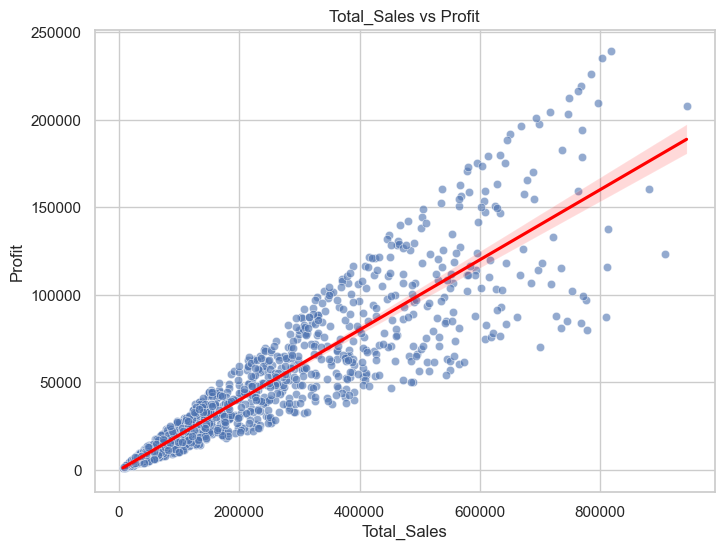

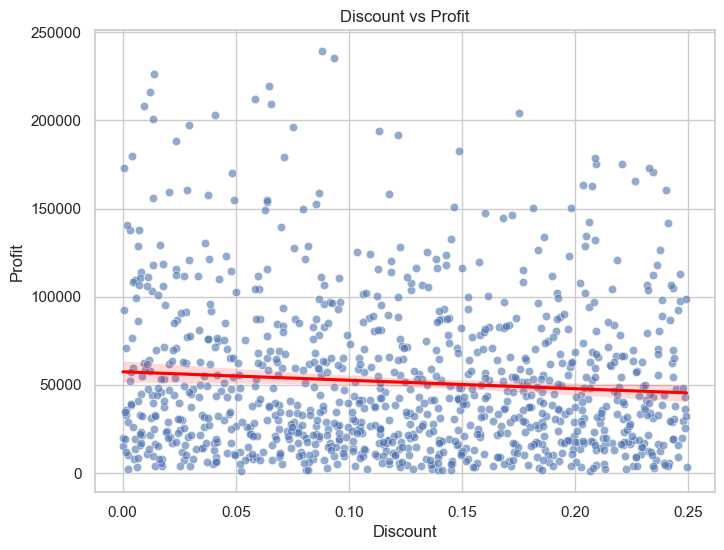

In [93]:
#This for Total Sales vs Profit
plt.figure(figsize=(8,6))
se.scatterplot(x='Total_Sales', y='Profit', data=df, alpha=0.6)
se.regplot(x='Total_Sales', y='Profit', data=df, scatter=False, line_kws={'color':'red'})
plt.title('Total_Sales vs Profit')
plt.show()

#This is for Discount vs Profit
plt.figure(figsize=(8,6))
se.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6)
se.regplot(x='Discount', y='Profit', data=df, scatter=False, line_kws={'color':'red'})
plt.title('Discount vs Profit')
plt.show()

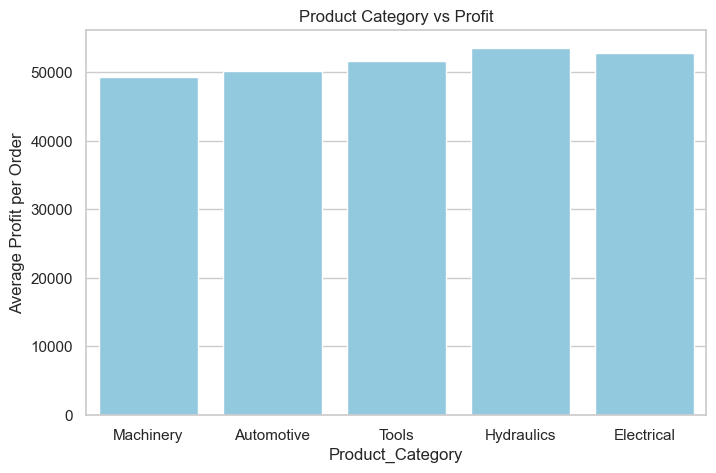

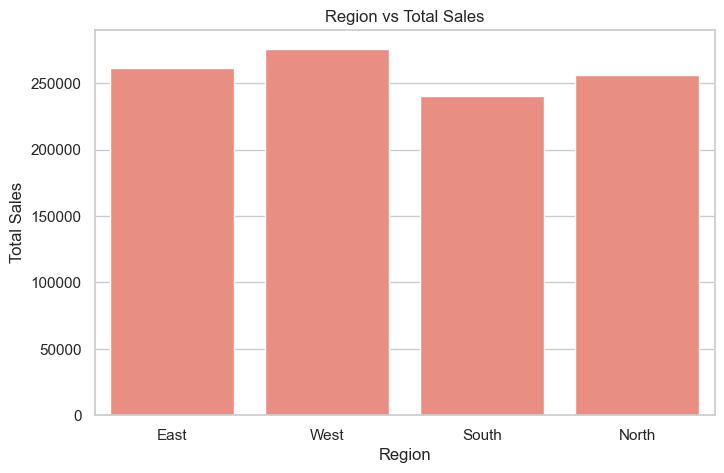

In [94]:
# This is for Product_Category vs Profit
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Product_Category', y='Profit', errorbar=None, estimator=np.mean, color='skyblue')
plt.title('Product Category vs Profit')
plt.ylabel('Average Profit per Order')
plt.show()

# And this is for Region vs Total_Sales
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Total_Sales', errorbar=None, estimator=np.mean, color='salmon')
plt.title('Region vs Total Sales')
plt.ylabel('Total Sales')
plt.show()

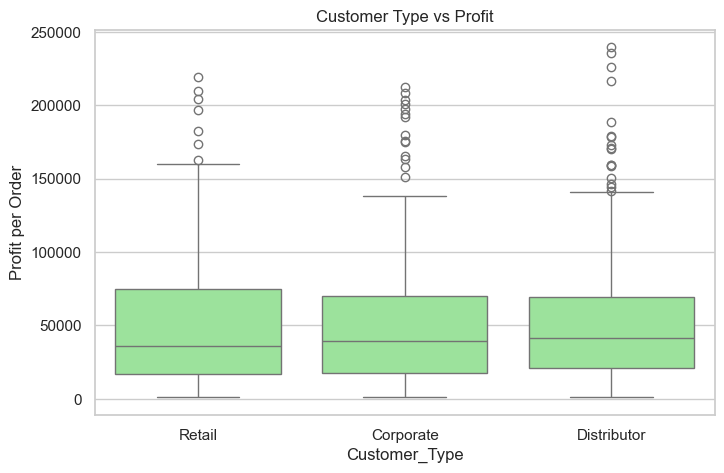

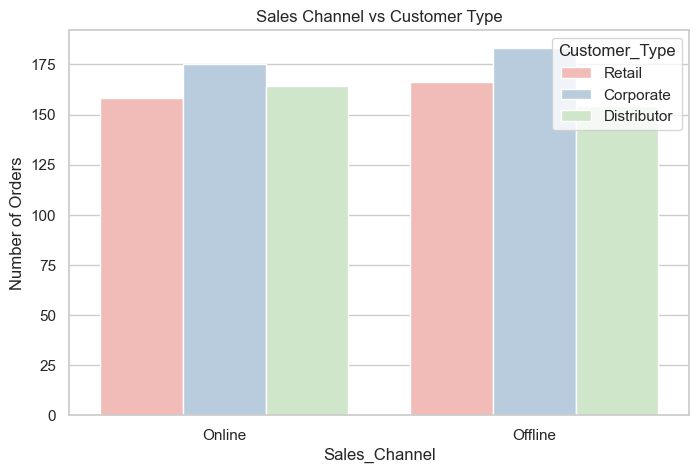

In [95]:
# This is for Customer_Type vs Profit
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Customer_Type', y='Profit',color='lightgreen')
plt.title('Customer Type vs Profit')
plt.ylabel('Profit per Order')
plt.show()

# And this is for Sales_Channel vs Customer_Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sales_Channel', hue='Customer_Type', palette='Pastel1')
plt.title('Sales Channel vs Customer Type')
plt.ylabel('Number of Orders')
plt.show()

**Correlation Matrix**

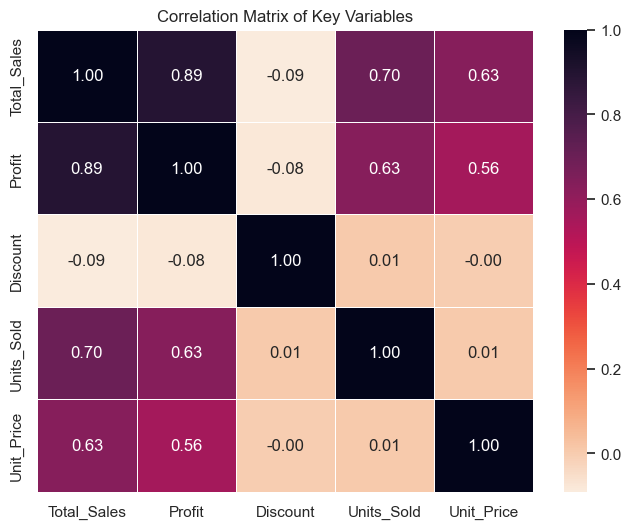

In [96]:
numeric_cols = ['Total_Sales', 'Profit', 'Discount', 'Units_Sold', 'Unit_Price']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
se.heatmap(corr_matrix,annot=True,cmap='rocket_r',fmt=".2f",linewidths=0.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()

**Trend analysis (monthly / yearly)**

,Year,Total_Sales,Profit
0,2022,8.706297e+07,1.724412e+07
1,2023,8.799474e+07,1.774766e+07
2,2024,8.308926e+07,1.651859e+07


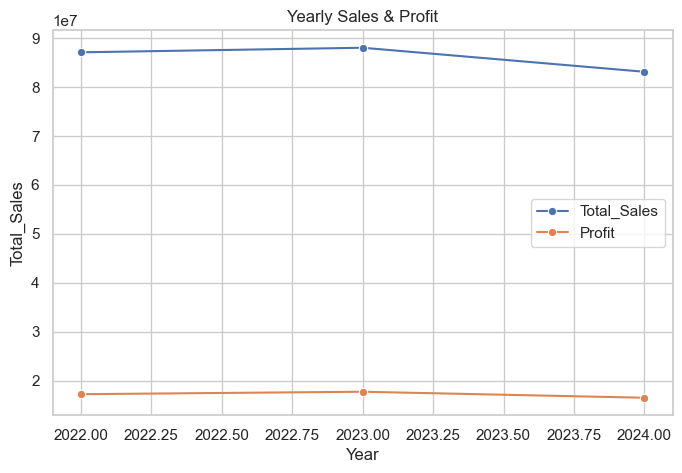

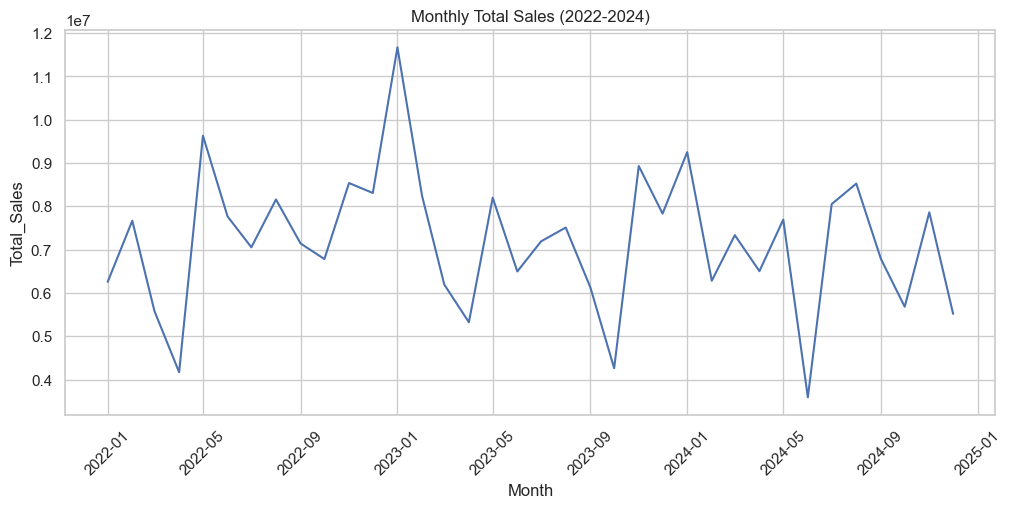

,Quarter,Total_Sales,Profit
4,2023Q1,2.611089e+07,5.261106e+06
3,2022Q4,2.363140e+07,4.712460e+06
10,2024Q3,2.336665e+07,4.689042e+06
8,2024Q1,2.287034e+07,4.478336e+06
2,2022Q3,2.235761e+07,4.345793e+06


In [97]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()
yearly = df.groupby('Year')[['Total_Sales','Profit']].sum().reset_index()
display(yearly)

plt.figure(figsize=(8,5))
se.lineplot(x='Year', y='Total_Sales', data=yearly, marker='o', label='Total_Sales')
sns.lineplot(x='Year', y='Profit', data=yearly, marker='o', label='Profit')
plt.title('Yearly Sales & Profit')
plt.show()

# monthly trend 
monthly = df.groupby('Month')[['Total_Sales','Profit']].sum().reset_index()
plt.figure(figsize=(12,5))
se.lineplot(x='Month', y='Total_Sales', data=monthly)
plt.title('Monthly Total Sales (2022-2024)')
plt.xticks(rotation=45)
plt.show()

# Here we identify quarterly peaks:
df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)
quarterly = df.groupby('Quarter')[['Total_Sales','Profit']].sum().reset_index()
display(quarterly.sort_values('Total_Sales', ascending=False).head())

**Top contributors (products, regions, customers)**

In [99]:
top_products_sales = df.groupby('Product_Name')['Total_Sales'].sum().sort_values(ascending=False).head(10)
top_products_profit = df.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False).head(10)
print("Top products by Sales:\n", top_products_sales)
print("\nTop products by Profit:\n", top_products_profit)
print("\nTop regions by Sales:\n", df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=False))
print("\nAvg Profit by Customer Type:\n", df.groupby('Customer_Type')['Profit'].mean().sort_values(ascending=False))

Top products by Sales:
 Product_Name
Valve              3.974253e+07
Pump               3.383008e+07
Compressor         3.345193e+07
Conveyor Belt      3.274361e+07
Drill              3.234104e+07
Motor              3.178667e+07
Gearbox            3.004176e+07
Welding Machine    2.420935e+07
Name: Total_Sales, dtype: float64

Top products by Profit:
 Product_Name
Valve              8.181380e+06
Pump               6.836435e+06
Conveyor Belt      6.636738e+06
Compressor         6.408389e+06
Drill              6.379794e+06
Motor              6.353599e+06
Gearbox            5.691240e+06
Welding Machine    5.022795e+06
Name: Profit, dtype: float64

Top regions by Sales:
 Region
North    6.691664e+07
West     6.571186e+07
East     6.407292e+07
South    6.144554e+07
Name: Total_Sales, dtype: float64

Avg Profit by Customer Type:
 Customer_Type
Distributor    52877.175343
Corporate      51692.028501
Retail         49968.156816
Name: Profit, dtype: float64
